# Association Rules

## Importing the Libraries:

In [27]:
!pip install networkx

In [28]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth
import networkx as nx

## Loading the Dataset:

In [3]:
my_movies_data= pd.read_csv('my_movies.csv')
my_movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
my_movies_data.shape

(10, 15)

# Pre-Processing

In [5]:
#We will drop the first 5 column of the dataset to make it Tidy Data for Association Rules
my_movies_data2= my_movies_data.copy()
my_movies_data2.drop(['V1','V2','V3','V4','V5'],inplace=True, axis=1)
my_movies_data2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Association Rules

There are two main functions here.

1. apriori() function evaluate support value for each product.
2. association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

Especially, "antecedent support", "consequent support", "support", "confidence" and "lift" variables are very important to make some business decisions.

## F-P Growth

### Find frequently occurring itemsets using F-P Growth

In [8]:
frequent_itemsets_fp=fpgrowth(my_movies_data2, min_support=0.1, use_colnames=True)

In [9]:
frequent_itemsets_fp

,support,itemsets
0,0.6,(Sixth Sense)
1,0.2,(Green Mile)
2,0.2,(LOTR2)
3,0.2,(Harry Potter1)
4,0.2,(LOTR1)
5,0.7,(Gladiator)
6,0.6,(Patriot)
7,0.1,(Braveheart)
8,0.1,(Harry Potter2)
9,0.1,(LOTR)


Note: what you observe is regardless of the technique you used, you arrived at the identical itemsets and support values. The only difference is the order in which they appear. You should notice that the output from F-P Growth appears in descending orders,

Support value gives us these information:

10 percent of 100 purchases are "Sixth Sense, LOTR, Green Mile, Gladiator"

60 percent of 100 purchases are "Sixth Sense"

### Mine the Association Rules

In [14]:
rules= association_rules(frequent_itemsets_fp, metric='confidence',min_threshold=0.6)
rules
rules.sort_values('confidence',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,"(Green Mile, LOTR1, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
84,"(Harry Potter1, Green Mile, LOTR1, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
98,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
97,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
96,"(Green Mile, LOTR1)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


Metric can be set to confidence, lift, support, leverage and conviction.

Note: “metric” and “min_threshold” parameters can be tuned on a case-by-case basis, depending on the business problem requirements.

An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

The result of association analysis shows which item is frequently purchased with other items.

In [15]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


## First Iteration: Find support values for each product

In [18]:
my_movies_data2.shape

(10, 10)

In [17]:
# Find Frequency of Items
my_movies_data2.sum()

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [23]:
# Product Frequency / Total Sales
first = pd.DataFrame(my_movies_data2.sum() / my_movies_data2.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [24]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


1. Support- It is the measure of frequency or abundance of an item in a dataset. It can be 'antecedent support', 'consequent support', and 'support'. 'antecedent support' contains proportion of transactions done for the antecedent while 'consequent support' involves those for consequent. 'Support' is computed for both antecedent and consequent in question.
2. Confidence-This gives the probability of consequent in a transaction given the presence of antecedent.
3. Lift- Given that antecedents and consequents are independent, how often do they come together/bought together.
4. Leverage- It is the difference between frequency of antecedent and consequent together in transactions to frequency of both in independent transactions. 
5. Conviction- A higher conviction score means that consequent is highly dependent on antecedent.

Apriori algorithm is used to extract frequent itemsets that are further used for association rule analysis. In this algorithm, user defines a minimum support that is the minimum threshold that decides if an itemset is considered as 'frequent'.

For Apriori algorithm, this dataset needs to be one-hot encoded. This is done using TransactionEncoder


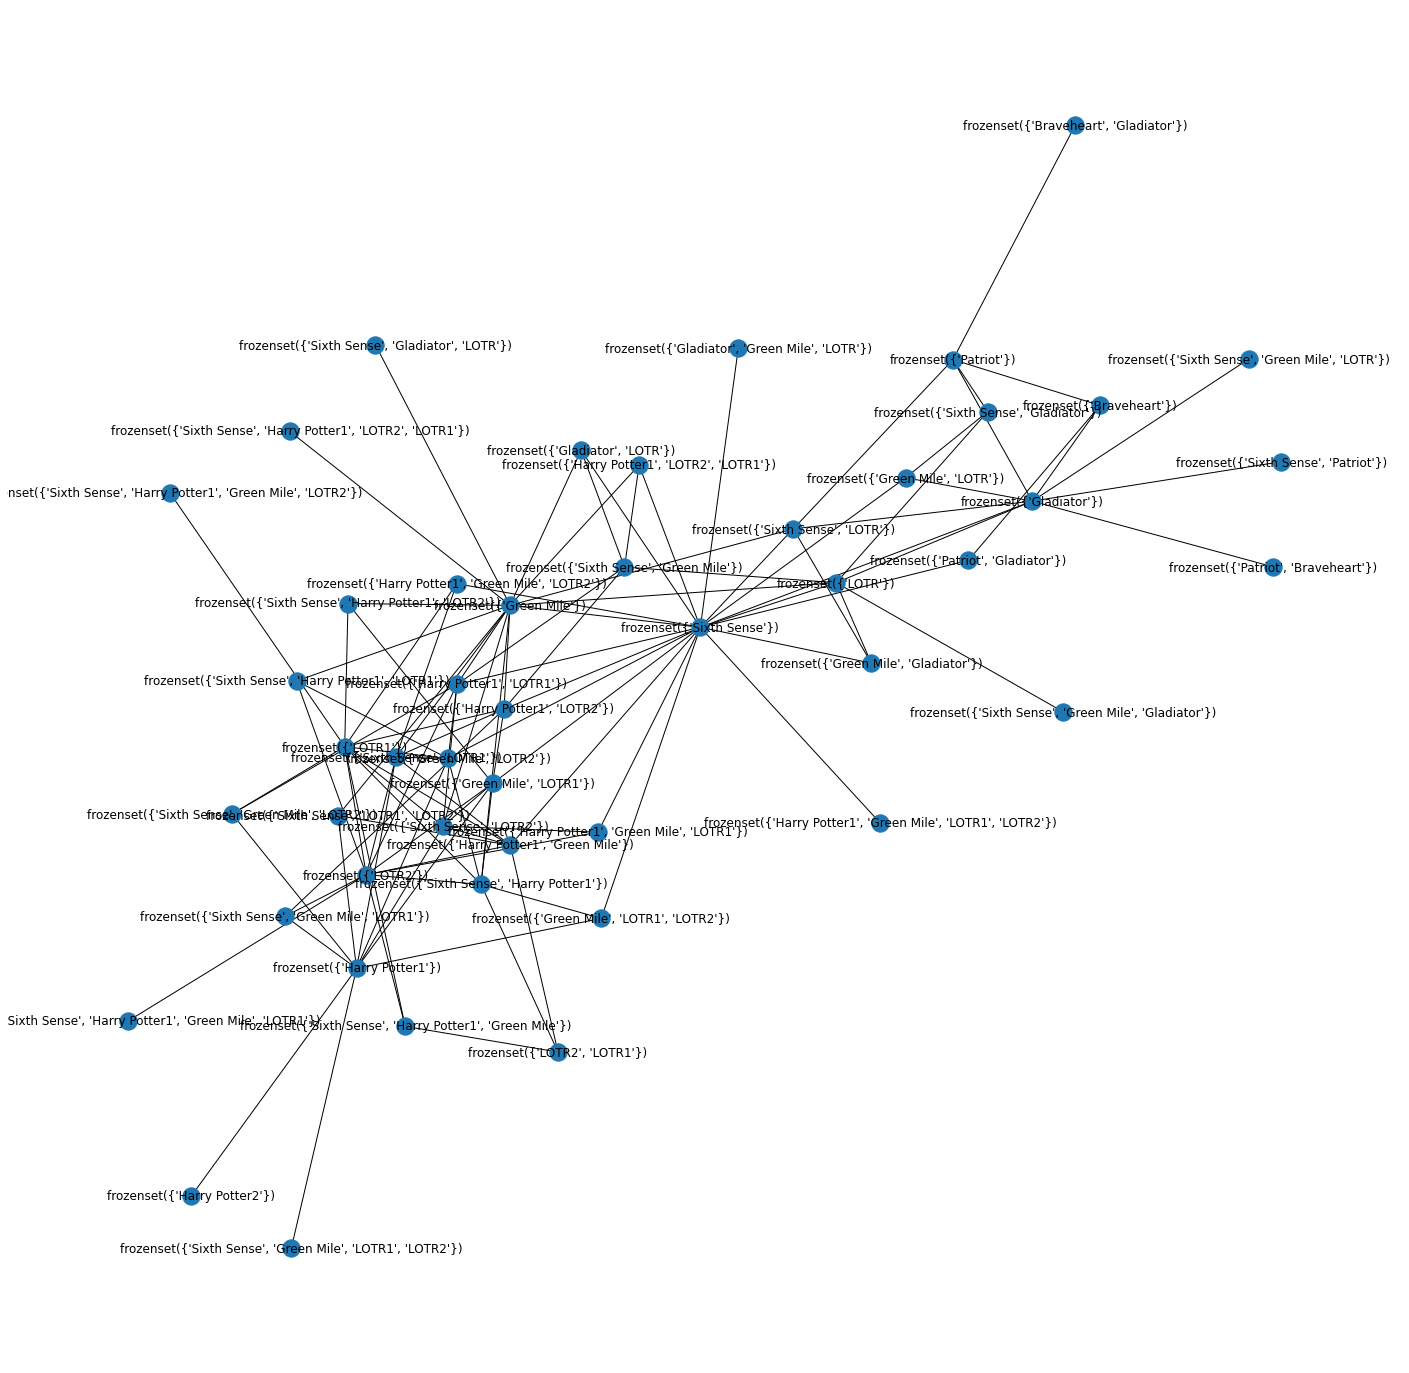

In [31]:
fig, ax=plt.subplots(figsize=(25,25))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

Sixth Sense is the best movie of this dataset and it shows association with every movie in the dataset. There are a couple of strategies that the movie seller can adopt to increase its sales considering the association we have seen between Sixth Sense and its 7 movies.

1. Promotional discount in either one of the 7 movies can entice customers to buy Sixth Sense (or the other way round, will also work).
2. Placing these 7 movies in suggestion close to Sixth Sense can be a good strategy to attract customers in buying these (which we see quite often to happen in every aspects of business).